# Cell Rank Trajectory Inference Depleted

In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scFates as scf

scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo", dpi_save=700)
cr.settings.verbosity = 2


How does the relative expression of these top Inflammatory markers change across cellrank pseudotime? 
-
And is there a difference between the VSMC and the VEC from coronary and pulmonary?

In [14]:
immune_genes = ['IL1B','IL1A','CCL2','IL11','IL32','CXCL5','CD55']

In [15]:
#open the filtered batch corrected anndata matrix 
adata = sc.read_h5ad('VEC/miQC/subtypes_Depleted_VEC_all_patients.h5ad')
adata

AnnData object with n_obs × n_vars = 23413 × 15535
    obs: 'n_genes', 'n_counts', 'percent_mito', 'Channel', 'scale', 'louvain_labels', 'Tissue', 'doublet_score', 'pred_dbl', 'splice', 'value'
    var: 'featureid', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features', 'mean', 'var', 'hvf_loess', 'hvf_rank'
    uns: 'PCs', '_attr2type', 'diffmap_evals', 'genome', 'louvain_labels_colors', 'louvain_resolution', 'modality', 'ncells', 'norm_count', 'pca', 'pca_features', 'stdzn_max_value', 'stdzn_mean', 'stdzn_std'
    obsm: 'X_diffmap', 'X_fle', 'X_pca', 'X_pca_harmony', 'X_phi', 'X_umap', 'diffmap_knn_distances', 'diffmap_knn_indices', 'pca_harmony_knn_distances', 'pca_harmony_knn_indices'
    varm: 'means', 'partial_sum'
    obsp: 'W_diffmap', 'W_pca_harmony'

In [16]:
#if want to use the plotting functions of scVelo 
#need to hack the function and add a hashable array in the adata.uns
#the arrays need to correlate with whatever values in adata.obs your interested in looking at 

#'#1D3461', '#247BA0','#87CEEB', '#FB3640', '#605F5E'
#adata.uns['louvain_labels_colors']= np.array(['#1D3461', '#247BA0', '#87CEEB'], dtype=object)
adata.uns['Tissue_colors']= np.array(['#BA0900', '#809693'], dtype=object)

In [17]:
adata.uns['Tissue_colors']

array(['#BA0900', '#809693'], dtype=object)

In [18]:
#sc.pp.neighbors(adata, use_rep='X_pca_regressed_harmony')
sc.pp.neighbors(adata, use_rep='X_pca_harmony')


In [19]:
#need to hack the tool in order to use the cellrank kernel 
adata.layers["spliced"] = adata.X
adata.layers["unspliced"] = adata.X
#30 and 30 
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:38) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [20]:
from cellrank.tl.kernels import CytoTRACEKernel

ctk = CytoTRACEKernel(adata)

Computing CytoTRACE score with `15535` genes
Adding `adata.obs['ct_score']`
       `adata.obs['ct_pseudotime']`
       `adata.obs['ct_num_exp_genes']`
       `adata.var['ct_gene_corr']`
       `adata.var['ct_correlates']`
       `adata.uns['ct_params']`
    Finish (0:00:12)


In [21]:
adata.layers['scaled'] = sc.pp.scale(adata, copy=True).X

In [22]:
early = list(adata.obs[adata.obs['ct_pseudotime']<=0.33].index.values)
early_cells = adata[adata.obs.index.isin(early)]

mid = list(adata.obs[(adata.obs['ct_pseudotime']<=0.66)&(adata.obs['ct_pseudotime']>0.33)].index.values)
mid_cells = adata[adata.obs.index.isin(mid)]

late = list(adata.obs[(adata.obs['ct_pseudotime']<=1.0)&(adata.obs['ct_pseudotime']>0.66)].index.values)
late_cells = adata[adata.obs.index.isin(late)]

In [40]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=200, frameon=True, 
                         vector_friendly=True, fontsize=14, figsize=(6,4))
                         

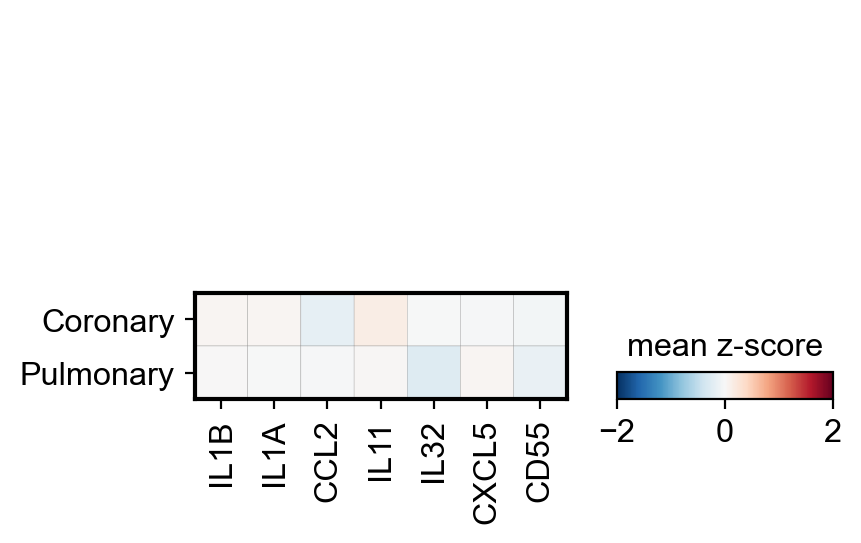

In [45]:
sc.pl.matrixplot(early_cells, immune_genes, 'Tissue', dendrogram=True, swap_axes=False, 
                 save='Immune_VEC_early.png',
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')


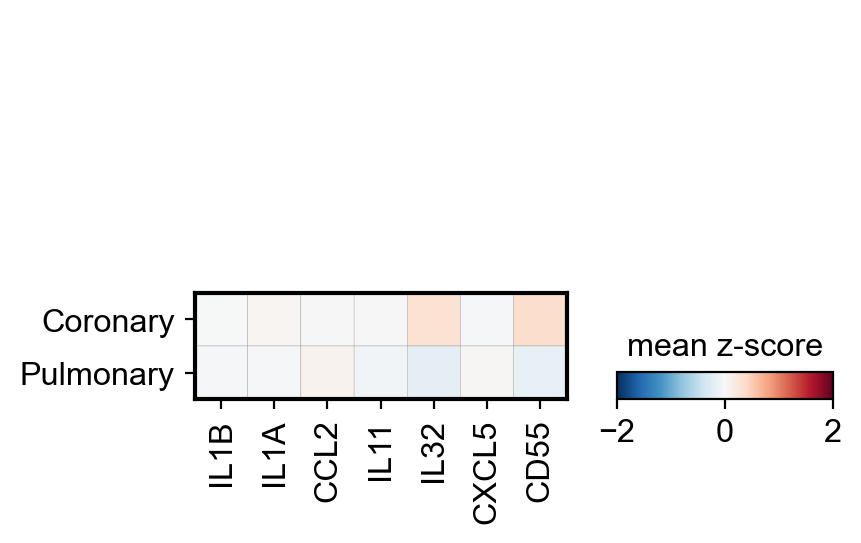

In [46]:
sc.pl.matrixplot(mid_cells, immune_genes, 'Tissue', dendrogram=True, swap_axes=False,
                 save='Immune_VEC_mid.png',
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')


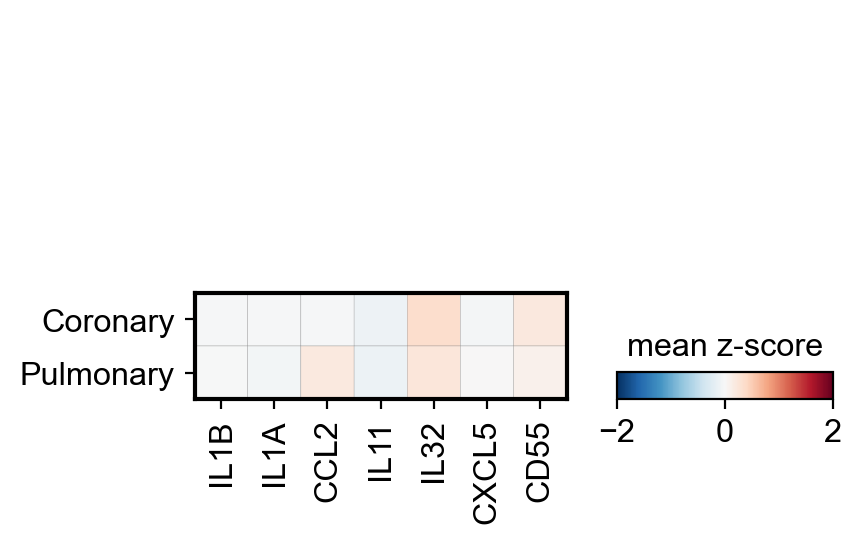

In [47]:
sc.pl.matrixplot(late_cells, immune_genes, 'Tissue', dendrogram=True, swap_axes=False,
                 save='Immune_VEC_late.png',
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')


In [3]:
#open the filtered batch corrected anndata matrix 
data = sc.read_h5ad('VSMC/PC_miQC/PC_miQC_subtypes_Depleted_VSMC_all_patients.h5ad')
data

AnnData object with n_obs × n_vars = 34144 × 16178
    obs: 'n_genes', 'n_counts', 'percent_mito', 'Channel', 'scale', 'louvain_labels', 'Tissue', 'doublet_score', 'pred_dbl', 'splice', 'value'
    var: 'featureid', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features', 'mean', 'var', 'hvf_loess', 'hvf_rank'
    uns: 'PCs', '_attr2type', 'diffmap_evals', 'genome', 'louvain_labels_colors', 'louvain_resolution', 'modality', 'ncells', 'norm_count', 'pca', 'pca_features', 'stdzn_max_value', 'stdzn_mean', 'stdzn_std'
    obsm: 'X_diffmap', 'X_fle', 'X_pca', 'X_pca_harmony', 'X_phi', 'X_umap', 'diffmap_knn_distances', 'diffmap_knn_indices', 'pca_harmony_knn_distances', 'pca_harmony_knn_indices'
    varm: 'means', 'partial_sum'
    obsp: 'W_diffmap', 'W_pca_harmony'

In [4]:
data.uns['Tissue_colors']= np.array(['#BA0900', '#809693'], dtype=object)

In [6]:
sc.pp.neighbors(data, use_rep='X_pca_harmony')

In [7]:
#need to hack the tool in order to use the cellrank kernel 
data.layers["spliced"] = data.X
data.layers["unspliced"] = data.X
#30 and 30 
scv.pp.moments(data, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:58) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [8]:
from cellrank.tl.kernels import CytoTRACEKernel

ctk = CytoTRACEKernel(data)

Computing CytoTRACE score with `16178` genes
Adding `adata.obs['ct_score']`
       `adata.obs['ct_pseudotime']`
       `adata.obs['ct_num_exp_genes']`
       `adata.var['ct_gene_corr']`
       `adata.var['ct_correlates']`
       `adata.uns['ct_params']`
    Finish (0:00:21)


In [9]:
data.layers['scaled'] = sc.pp.scale(data, copy=True).X

In [10]:
dearly = list(data.obs[data.obs['ct_pseudotime']<=0.33].index.values)
dearly_cells = data[data.obs.index.isin(dearly)]

dmid = list(data.obs[(data.obs['ct_pseudotime']<=0.66)&(data.obs['ct_pseudotime']>0.33)].index.values)
dmid_cells = data[data.obs.index.isin(dmid)]

dlate = list(data.obs[(data.obs['ct_pseudotime']<=1.0)&(data.obs['ct_pseudotime']>0.66)].index.values)
dlate_cells = data[data.obs.index.isin(dlate)]

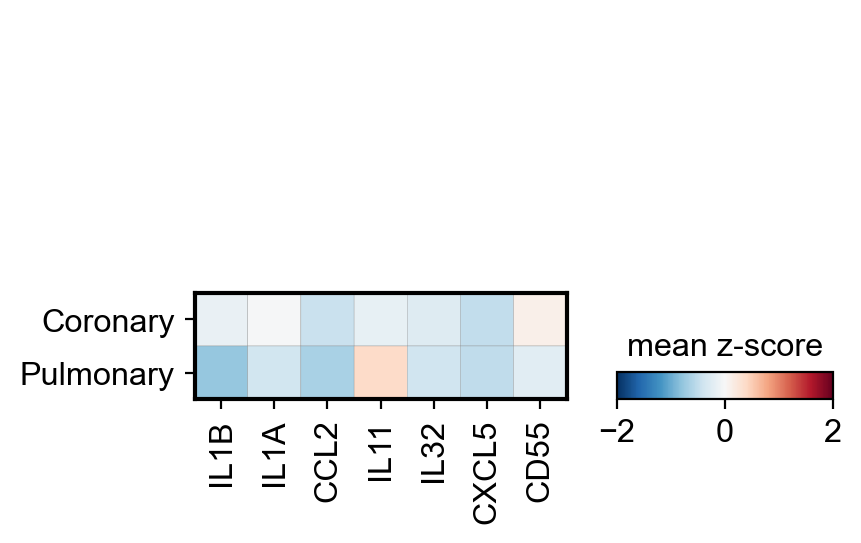

In [48]:
sc.pl.matrixplot(dearly_cells, immune_genes, 'Tissue', dendrogram=True, swap_axes=False,
                 save='Immune_VSMC_early.png',
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

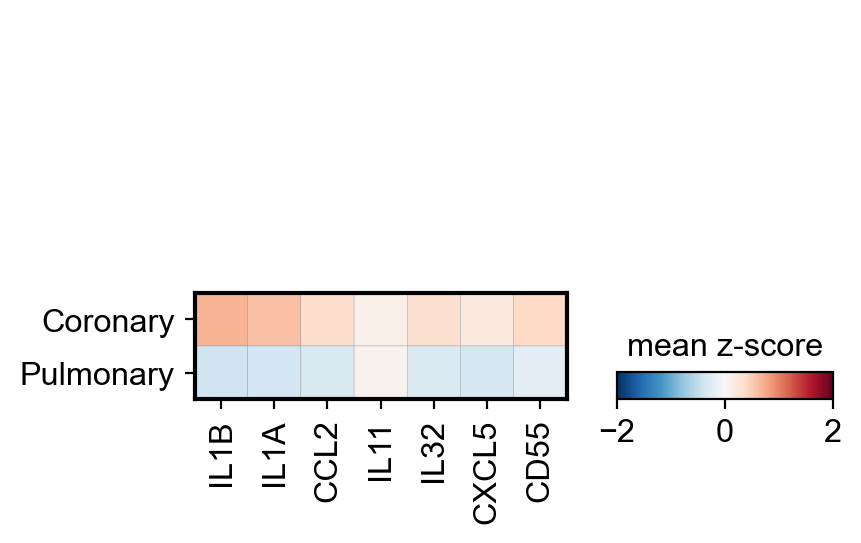

In [49]:
sc.pl.matrixplot(dmid_cells, immune_genes, 'Tissue', dendrogram=True, swap_axes=False,
                 save='Immune_VSMC_mid.png',
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

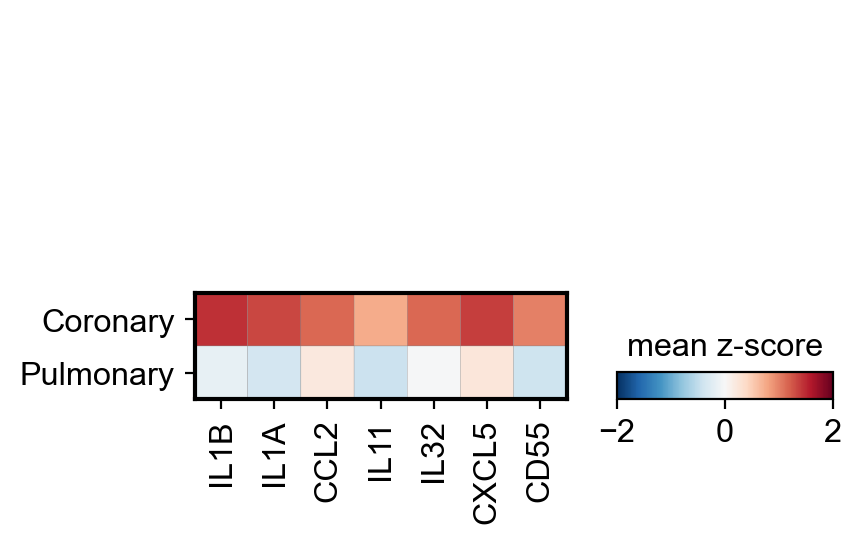

In [50]:
sc.pl.matrixplot(dlate_cells, immune_genes, 'Tissue', dendrogram=True, swap_axes=False,
                 save='Immune_VSMC_late.png',
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

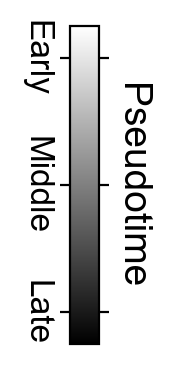

In [11]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(1, 2))
#fig.subplots_adjust(bottom=0.5)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap='gray',
                                norm=norm,
                                orientation='vertical')
ticks = [0.1,0.5,0.9]
ax.set_yticks(ticks)
labels = ['Late', 'Middle','Early']
ax.set_yticklabels(labels, rotation=270, verticalalignment= 'center', fontsize=12)
ax.yaxis.tick_left()
ax.yaxis.set_ticks_position('both')

cb1.set_label('Pseudotime', rotation = 270, fontsize=14, labelpad=18)

fig.tight_layout()
plt.savefig('VEC/PC_figures/Pseudotime_bar_3.png',dpi=200, pad_inches=3)
